___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Multivariate Time Series Forecasting with RNN<br><br>Demand Prediction Project (Bike Sharing)<br><h1>

# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*
    
- Drop unnecessary columns
    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Evaluate on Test Data

- Inverse Transform
- Plot Prediction

#### 5. Retrain and Forecasting

## Improt Libraries and Indest Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("store_sharing - store_sharing.csv",index_col='timestamp',
                 parse_dates=True)

In [3]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


---
---

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  object 
 2   t2            17414 non-null  object 
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  object 
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [5]:
df['t1'] = pd.to_numeric(df['t1'], errors='coerce')

In [6]:
df['wind_speed'] = pd.to_numeric(df['wind_speed'], errors='coerce')

In [7]:
df['t2'] = pd.to_numeric(df['t2'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17413 non-null  float64
 2   t2            17413 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17412 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [9]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17413.000000,17413.000000,17414.000000,17412.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468213,11.520904,72.324954,15.914068,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571954,6.615329,14.313186,7.894320,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [10]:
df.isnull().sum()

cnt             0
t1              1
t2              1
hum             0
wind_speed      2
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [11]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [12]:
df.duplicated().sum()

2

In [13]:
df.dropna(how="any", inplace=True)

In [14]:
df.drop_duplicates(keep=False, inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [17]:
#season  0-spring ; 1-summer; 2-fall; 3-winter.
 
str(df['season'].value_counts()).split('\n')

['0.0    4394',
 '1.0    4383',
 '3.0    4330',
 '2.0    4301',
 'Name: season, dtype: int64']

In [18]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [19]:
df.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


### Plot Breakdowns of Data

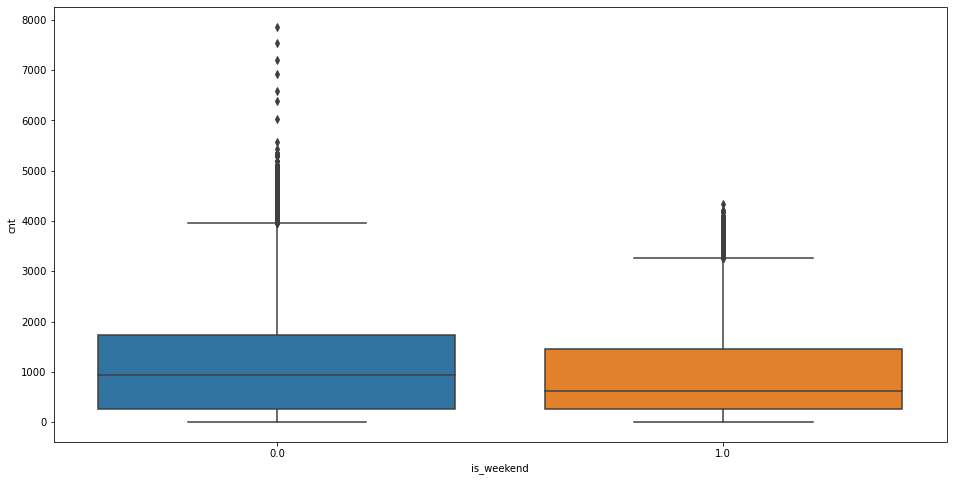

In [20]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x="is_weekend", y="cnt");

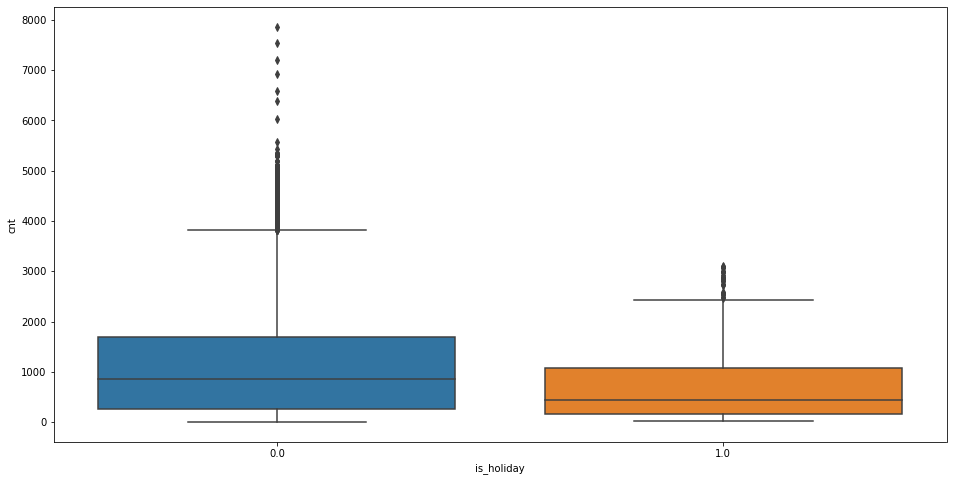

In [21]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x="is_holiday", y="cnt");

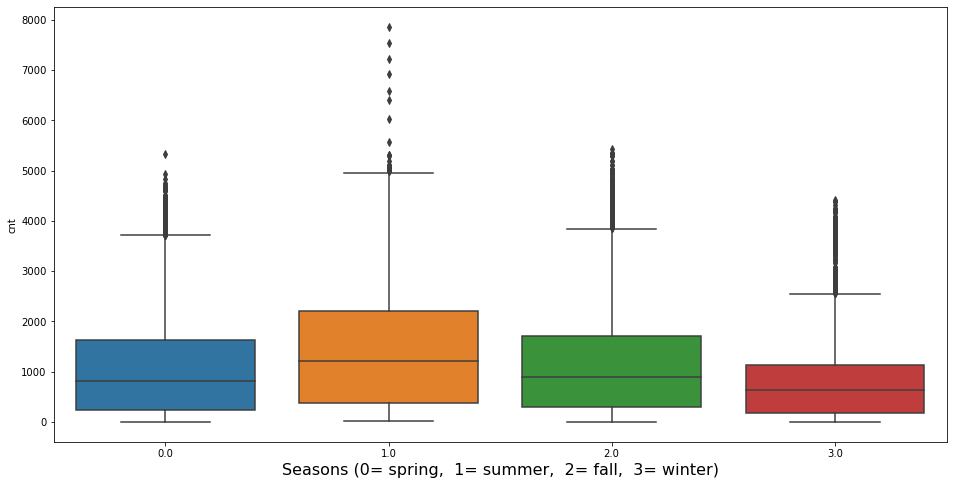

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(x='season', y='cnt', data=df)
plt.xlabel("Seasons (0= spring,  1= summer,  2= fall,  3= winter)", fontsize=16)
plt.show()

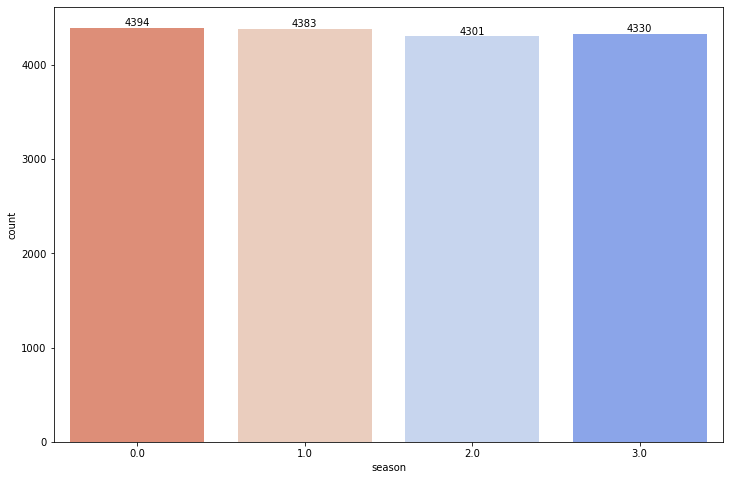

In [23]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="season", data= df, palette="coolwarm_r")
ax.bar_label(ax.containers[0]);

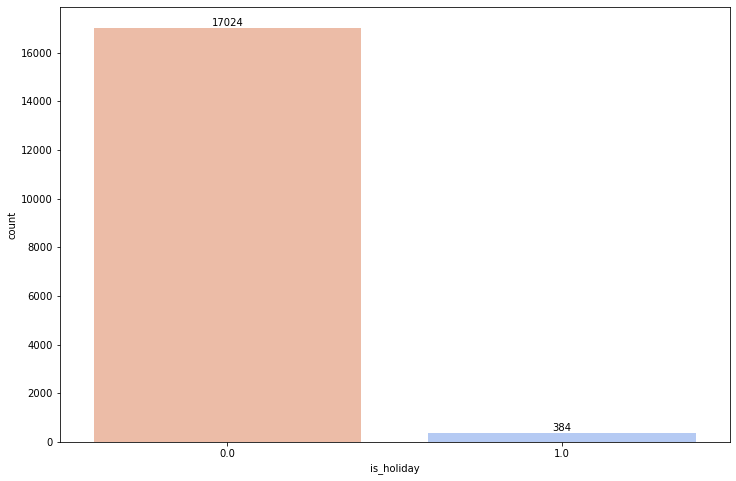

In [24]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="is_holiday", data= df, palette="coolwarm_r")
ax.bar_label(ax.containers[0]);

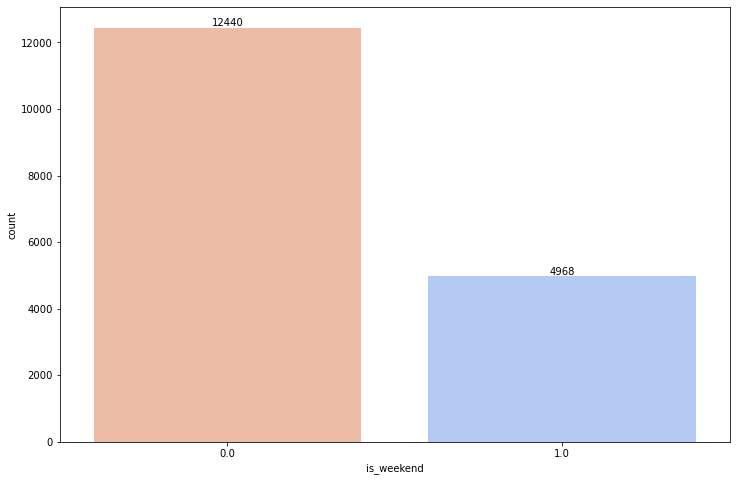

In [25]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="is_weekend", data= df, palette="coolwarm_r")
ax.bar_label(ax.containers[0]);

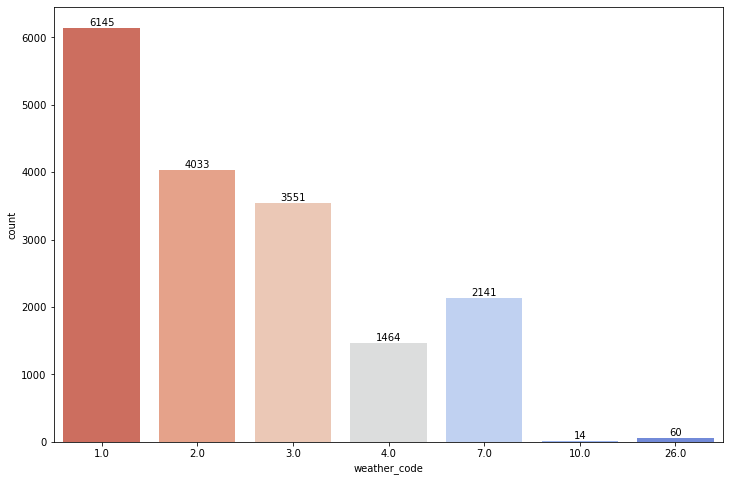

In [26]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="weather_code", data= df, palette="coolwarm_r")
ax.bar_label(ax.containers[0]);

In [27]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

***i. Plot bike shares over time***

In [28]:
#df["timestamp"] = df.timestamp.apply(pd.to_datetime)
#df["year"]  = df.timestamp.apply(lambda x:x.year)
#df['month'] = df.timestamp.apply(lambda x:x.month)
#df['day_of_week']  = df.timestamp.apply(lambda x:x.dayofweek)
#df['hour']  = df.timestamp.apply(lambda x:x.hour)

In [29]:
df["year_month"] = df.index.strftime('%Y-%m')
df["year"] = df.index.year
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.day_of_week
df["hour"] = df.index.hour

In [30]:
df.drop("year_month", axis = 1, inplace = True)

In [31]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,1,19
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,1,20
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,1,21


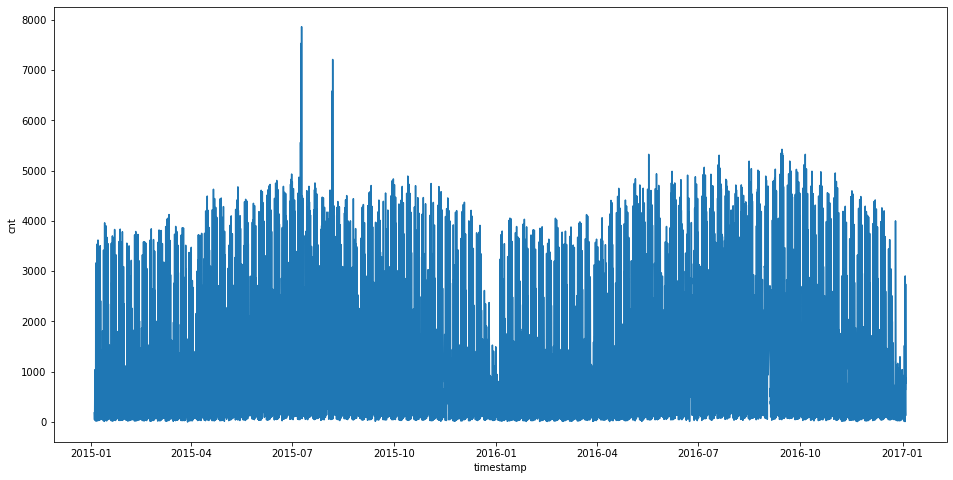

In [32]:
plt.figure(figsize=(16,8))
sns.lineplot(data = df, x = df.index, y = "cnt")
plt.show()

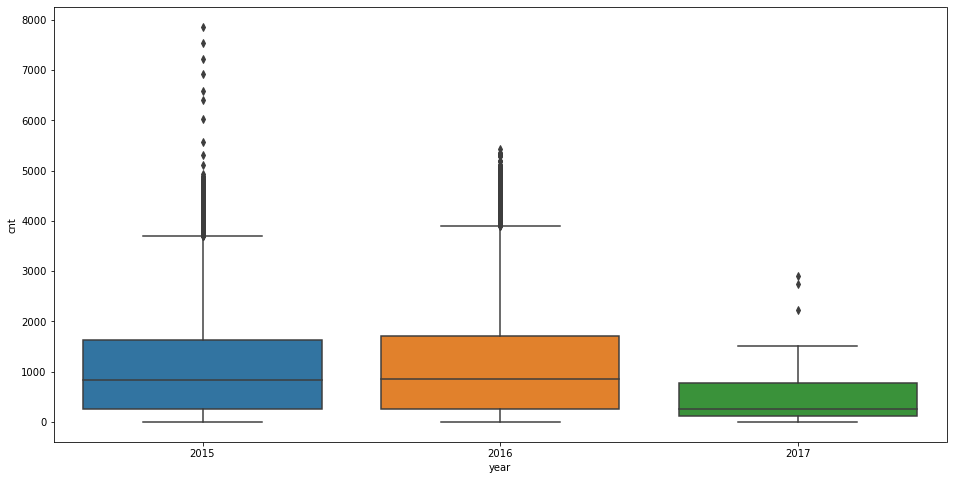

In [33]:
plt.figure(figsize=(16,8))
sns.boxplot(x='year',y='cnt', data=df) 
plt.show()

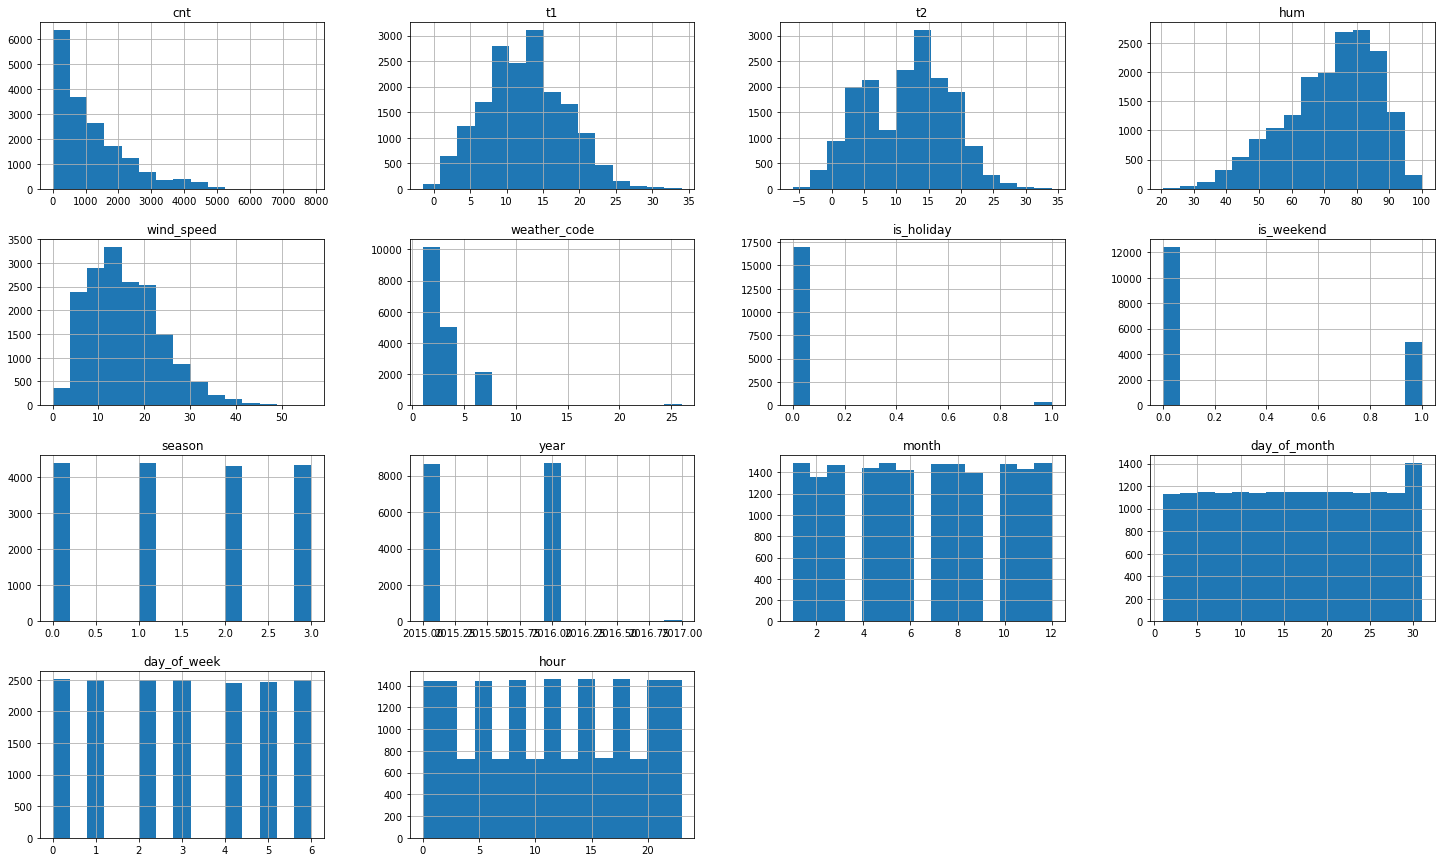

In [34]:
df.hist(figsize=(25, 15), bins=15);

***ii. Plot bike shares by months***

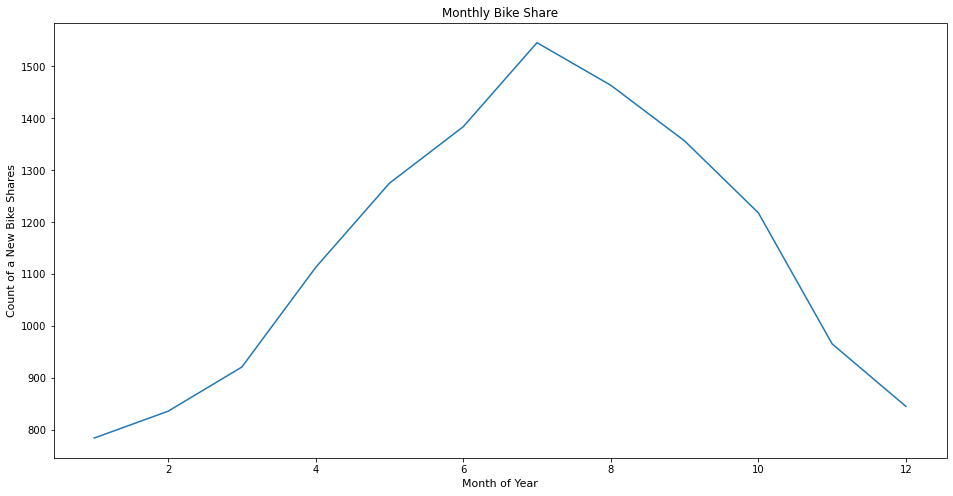

In [35]:
plt.figure(figsize = (16,8))
sns.lineplot(data =df,  x='month', y='cnt',  palette="coolwarm_r", ci=None)
plt.xlabel('Month of Year', fontsize='11')
plt.ylabel('Count of a New Bike Shares', fontsize='11')
plt.title('Monthly Bike Share')
plt.show()

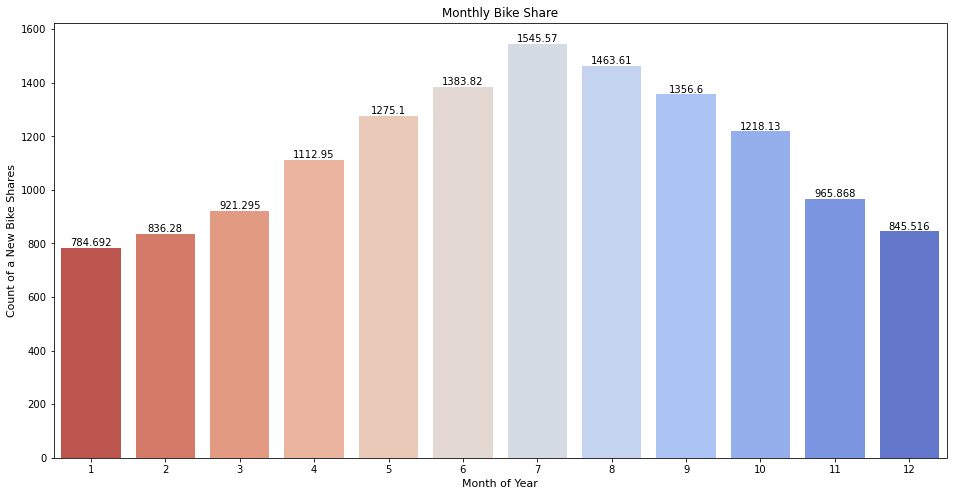

In [36]:
plt.figure(figsize = (16,8))
ax = sns.barplot(data =df,  x='month', y='cnt',  palette="coolwarm_r", ci=None)
ax.bar_label(ax.containers[0])
plt.xlabel('Month of Year', fontsize='11')
plt.ylabel('Count of a New Bike Shares', fontsize='11')
plt.title('Monthly Bike Share')
plt.show()

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

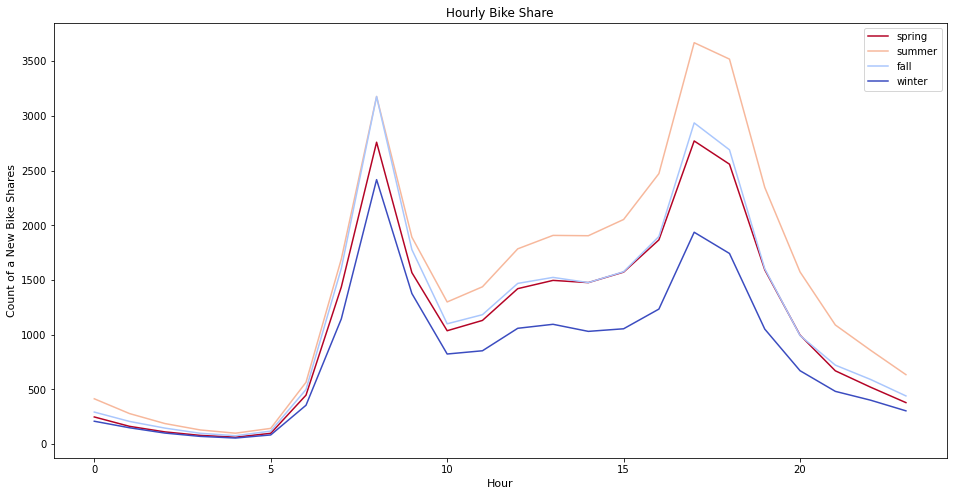

In [37]:
plt.figure(figsize = (16,8))
sns.lineplot(data =df,  x='hour', y='cnt',  palette="coolwarm_r", hue="season" ,ci=None)
plt.xlabel('Hour', fontsize='11')
plt.ylabel('Count of a New Bike Shares', fontsize='11')
plt.title('Hourly Bike Share')
plt.legend(["spring",  "summer",  "fall",  "winter"])
plt.show()

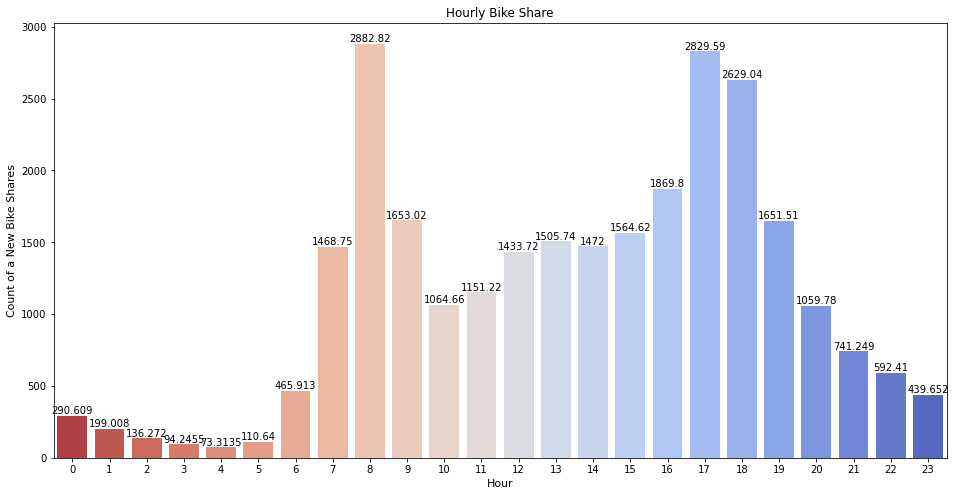

In [38]:
plt.figure(figsize = (16,8))
ax = sns.barplot(data =df,  x='hour', y='cnt',  palette="coolwarm_r", ci=None)
ax.bar_label(ax.containers[0])
plt.xlabel('Hour', fontsize='11')
plt.ylabel('Count of a New Bike Shares', fontsize='11')
plt.title('Hourly Bike Share')
plt.show()

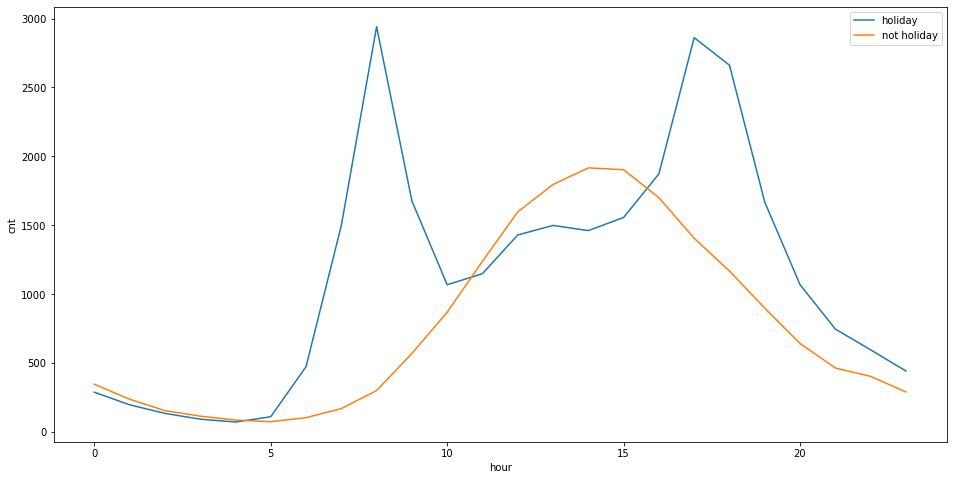

In [39]:
plt.figure(figsize = (16,8))
sns.lineplot(data = df, x = "hour", y = "cnt", hue = "is_holiday", ci = None)
plt.legend(["holiday", "not holiday"])
plt.show()

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

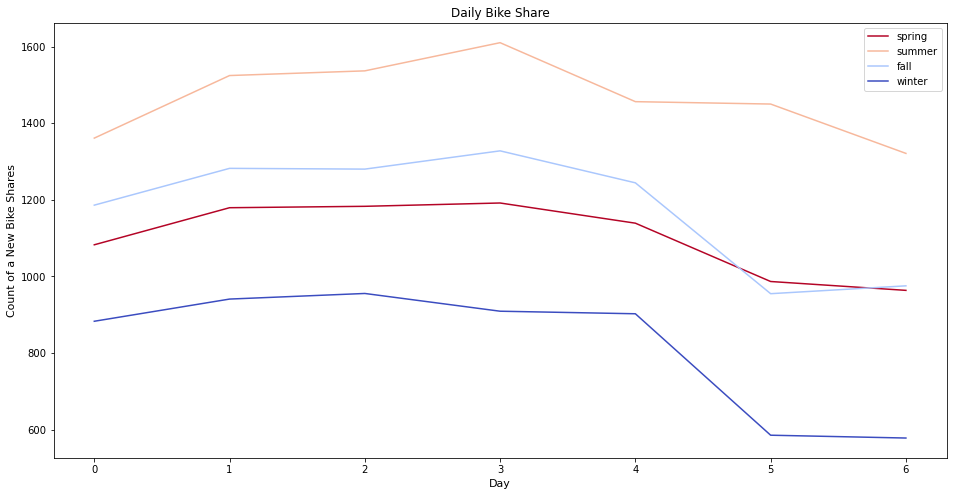

In [40]:
plt.figure(figsize = (16,8))
sns.lineplot(data =df,  x=df['day_of_week'], y='cnt', hue="season", palette="coolwarm_r", ci=None)
plt.xlabel('Day', fontsize='11')
plt.ylabel('Count of a New Bike Shares', fontsize='11')
plt.legend(["spring",  "summer",  "fall",  "winter"])
plt.title('Daily Bike Share')
plt.show()

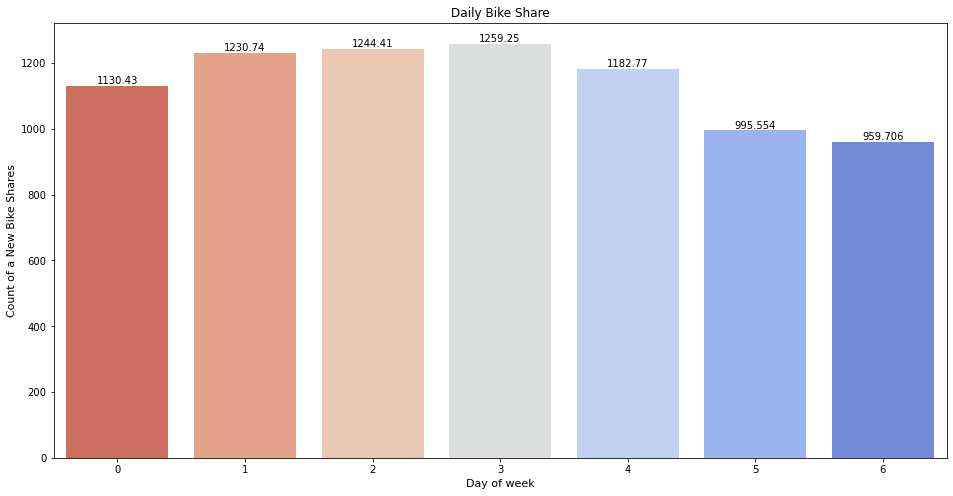

In [41]:
plt.figure(figsize = (16,8))
ax = sns.barplot(data =df,  x='day_of_week', y='cnt',  palette="coolwarm_r", ci=None)
ax.bar_label(ax.containers[0])
plt.xlabel('Day of week', fontsize='11')
plt.ylabel('Count of a New Bike Shares', fontsize='11')
plt.title('Daily Bike Share')
plt.show()

***v. Plot the distribution of bike shares on holidays by seasons***

In [42]:
df["is_holiday"].value_counts()

0.0    17024
1.0      384
Name: is_holiday, dtype: int64

In [43]:
#  1 = holiday 
#  0 = non holiday

In [44]:
df_2 = df[df["is_holiday"]==1]

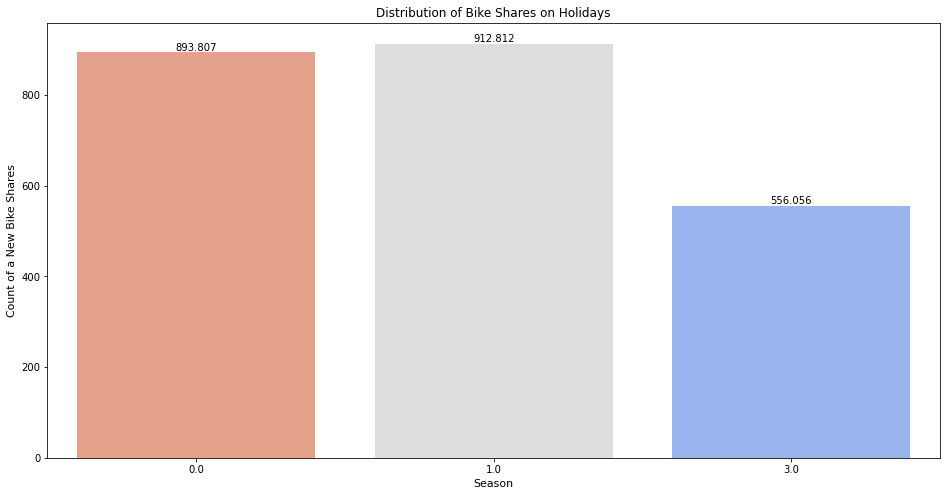

In [45]:
plt.figure(figsize = (16,8))
ax = sns.barplot(data =df_2,  x=df_2['season'], y='cnt' , palette="coolwarm_r", ci=None)
ax.bar_label(ax.containers[0])
plt.xlabel('Season', fontsize='11')
plt.ylabel('Count of a New Bike Shares', fontsize='11')
plt.title('Distribution of Bike Shares on Holidays')
plt.show()

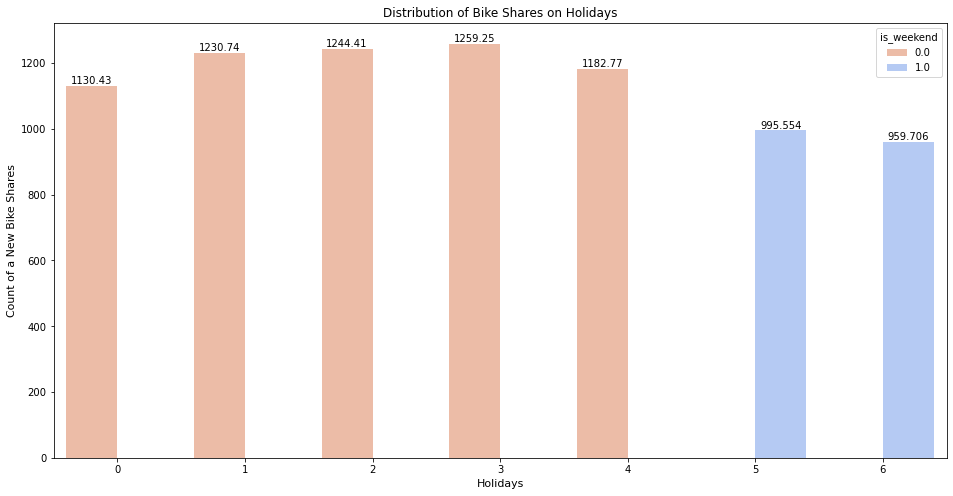

In [46]:
plt.figure(figsize = (16,8))
ax = sns.barplot(data =df,  x='day_of_week', y='cnt', hue = "is_weekend", palette="coolwarm_r", ci=None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('Holidays', fontsize='11')
plt.ylabel('Count of a New Bike Shares', fontsize='11')
plt.title('Distribution of Bike Shares on Holidays')
plt.show()

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

<AxesSubplot:>

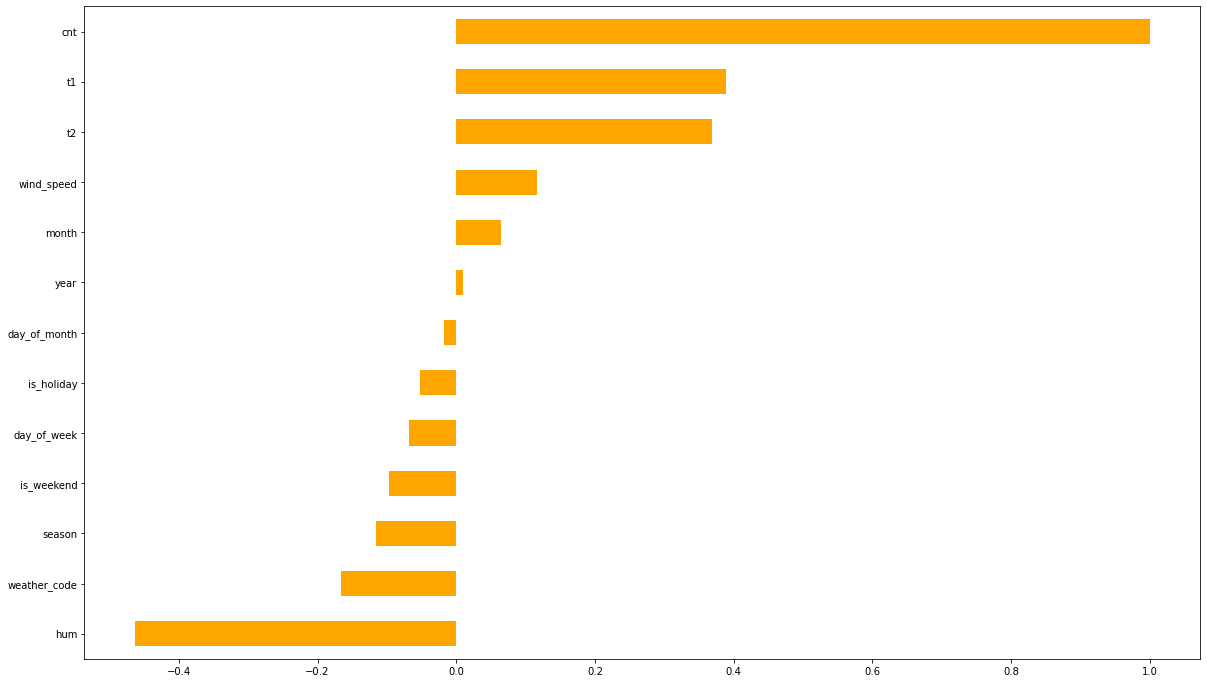

In [47]:
plt.figure(figsize=[20,12])
df.corr()['cnt'][:-1].sort_values().plot.barh(color="orange")

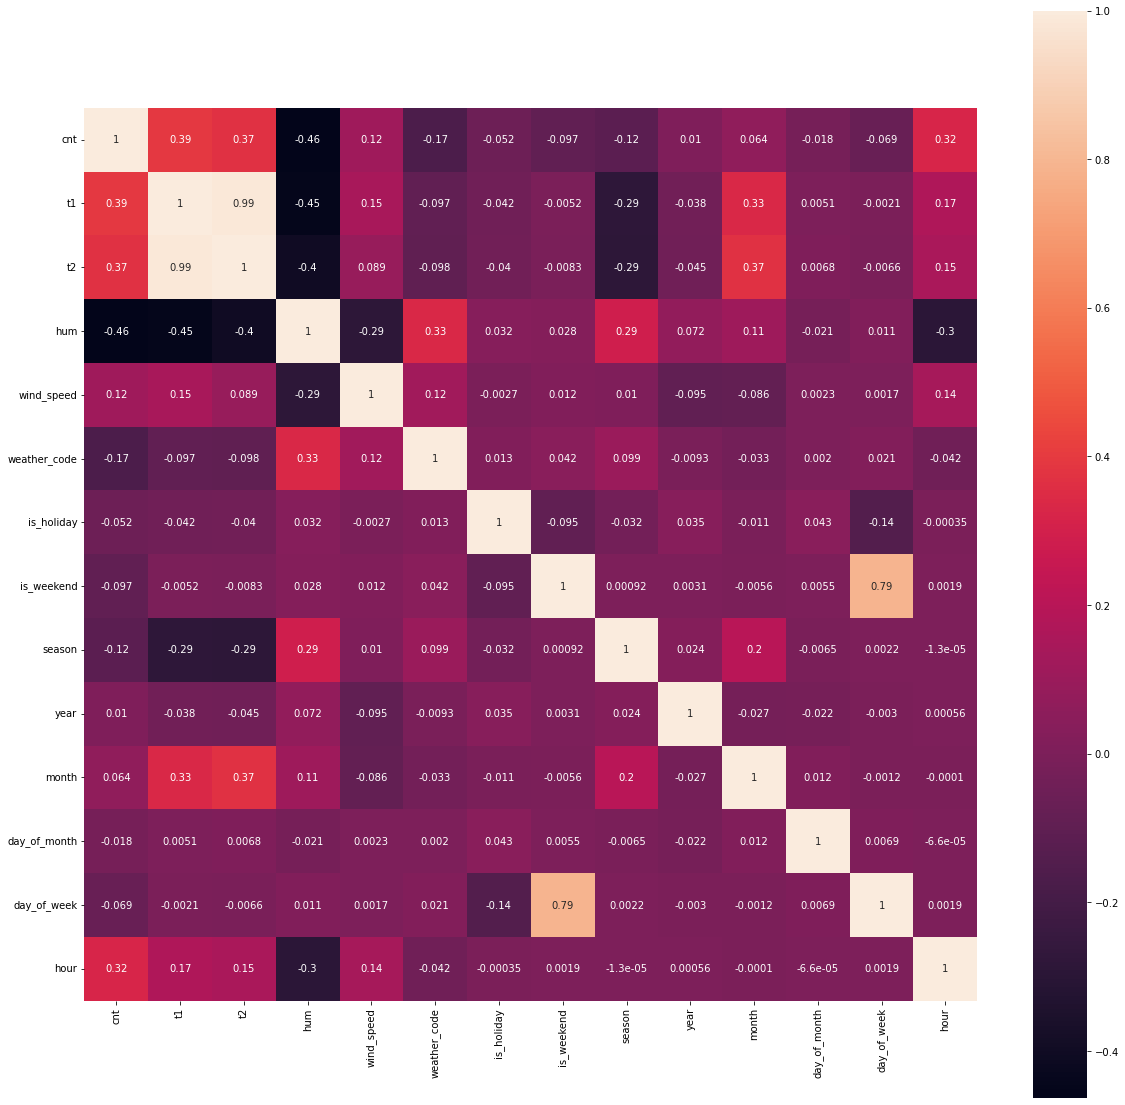

In [48]:
fig = plt.figure(figsize=[20,20]) #Heat map
ax = sns.heatmap(df.corr(),annot=True,square=True)

In [49]:
df["weather_code"].value_counts()

1.0     6145
2.0     4033
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

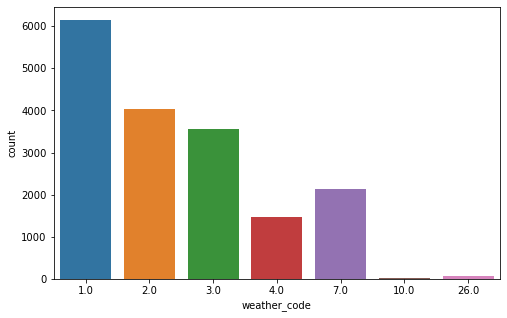

In [50]:
plt.figure(figsize = (8,5))
sns.countplot(x = "weather_code", data = df)
plt.show()

In [51]:

df.drop("t2", axis = 1, inplace = True)

In [52]:
df.shape

(17408, 13)

In [53]:
df

,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,1,19
2017-01-03 20:00:00,541,5.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,1,20
2017-01-03 21:00:00,337,5.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,1,21


In [54]:
df.weather_code = df.weather_code.map({1:'clear',2:'scattered_clouds',
                     3:'broken_cloud',4:'cloudy',
                     7:'light_rain',10:'rain_thunderstorm',26:'snowfall'})
df.weather_code 

timestamp
2015-01-04 00:00:00        broken_cloud
2015-01-04 01:00:00               clear
2015-01-04 02:00:00               clear
2015-01-04 03:00:00               clear
2015-01-04 04:00:00               clear
                             ...       
2017-01-03 19:00:00        broken_cloud
2017-01-03 20:00:00              cloudy
2017-01-03 21:00:00              cloudy
2017-01-03 22:00:00              cloudy
2017-01-03 23:00:00    scattered_clouds
Name: weather_code, Length: 17408, dtype: object

In [55]:
df.season = df.season.map({0:'spring',1:'summer',2:'fall',3:'winter'})
df.season

timestamp
2015-01-04 00:00:00    winter
2015-01-04 01:00:00    winter
2015-01-04 02:00:00    winter
2015-01-04 03:00:00    winter
2015-01-04 04:00:00    winter
                        ...  
2017-01-03 19:00:00    winter
2017-01-03 20:00:00    winter
2017-01-03 21:00:00    winter
2017-01-03 22:00:00    winter
2017-01-03 23:00:00    winter
Name: season, Length: 17408, dtype: object

In [56]:
df = pd.get_dummies(df, drop_first=True)

In [57]:
df.columns

Index(['cnt', 't1', 'hum', 'wind_speed', 'is_holiday', 'is_weekend', 'year',
       'month', 'day_of_month', 'day_of_week', 'hour', 'weather_code_clear',
       'weather_code_cloudy', 'weather_code_light_rain',
       'weather_code_rain_thunderstorm', 'weather_code_scattered_clouds',
       'weather_code_snowfall', 'season_spring', 'season_summer',
       'season_winter'],
      dtype='object')

In [58]:
drop_columns = ["year", "month", "day_of_month", "day_of_week"]
df.drop(drop_columns, axis = 1, inplace = True)
df.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_spring,season_summer,season_winter
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,93.0,6.0,0.0,1.0,0,0,0,0,0,0,0,0,0,1
2015-01-04 01:00:00,138,3.0,93.0,5.0,0.0,1.0,1,1,0,0,0,0,0,0,0,1
2015-01-04 02:00:00,134,2.5,96.5,0.0,0.0,1.0,2,1,0,0,0,0,0,0,0,1
2015-01-04 03:00:00,72,2.0,100.0,0.0,0.0,1.0,3,1,0,0,0,0,0,0,0,1
2015-01-04 04:00:00,47,2.0,93.0,6.5,0.0,1.0,4,1,0,0,0,0,0,0,0,1


In [59]:
df.shape

(17408, 16)

In [60]:
df.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_spring,season_summer,season_winter
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,93.0,6.0,0.0,1.0,0,0,0,0,0,0,0,0,0,1
2015-01-04 01:00:00,138,3.0,93.0,5.0,0.0,1.0,1,1,0,0,0,0,0,0,0,1
2015-01-04 02:00:00,134,2.5,96.5,0.0,0.0,1.0,2,1,0,0,0,0,0,0,0,1
2015-01-04 03:00:00,72,2.0,100.0,0.0,0.0,1.0,3,1,0,0,0,0,0,0,0,1
2015-01-04 04:00:00,47,2.0,93.0,6.5,0.0,1.0,4,1,0,0,0,0,0,0,0,1


In [61]:
df.isnull().sum()

cnt                               0
t1                                0
hum                               0
wind_speed                        0
is_holiday                        0
is_weekend                        0
hour                              0
weather_code_clear                0
weather_code_cloudy               0
weather_code_light_rain           0
weather_code_rain_thunderstorm    0
weather_code_scattered_clouds     0
weather_code_snowfall             0
season_spring                     0
season_summer                     0
season_winter                     0
dtype: int64

## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

In [62]:
len(df)

17408

In [63]:
test_days = 60
test_ind = test_days*24
test_ind

1440

In [64]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [65]:
train.shape, test.shape

((15968, 16), (1440, 16))

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

In [66]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [67]:
df.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_spring,season_summer,season_winter
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,93.0,6.0,0.0,1.0,0,0,0,0,0,0,0,0,0,1
2015-01-04 01:00:00,138,3.0,93.0,5.0,0.0,1.0,1,1,0,0,0,0,0,0,0,1
2015-01-04 02:00:00,134,2.5,96.5,0.0,0.0,1.0,2,1,0,0,0,0,0,0,0,1
2015-01-04 03:00:00,72,2.0,100.0,0.0,0.0,1.0,3,1,0,0,0,0,0,0,0,1
2015-01-04 04:00:00,47,2.0,93.0,6.5,0.0,1.0,4,1,0,0,0,0,0,0,0,1


In [68]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [69]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: target value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [70]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15944, 24, 16) (15944,)
(1416, 24, 16) (1416,)


In [71]:
y_test

array([-0.30282175, -0.35719202, -0.39848589, ..., -0.36063317,
       -0.4384033 , -0.49690296])

In [72]:
X_test

array([[[-0.27116311, -0.75      ,  0.675     , ...,  0.        ,
          0.        ,  0.        ],
        [-0.38059188, -0.8125    ,  0.675     , ...,  0.        ,
          0.        ,  0.        ],
        [-0.38403304, -0.875     ,  0.675     , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.06813489, -0.8125    , -0.25      , ...,  0.        ,
          0.        ,  0.        ],
        [-0.14108741, -0.875     , -0.125     , ...,  0.        ,
          0.        ,  0.        ],
        [-0.27873365, -0.875     , -0.125     , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.38059188, -0.8125    ,  0.675     , ...,  0.        ,
          0.        ,  0.        ],
        [-0.38403304, -0.875     ,  0.675     , ...,  0.        ,
          0.        ,  0.        ],
        [-0.46180317, -1.        ,  0.975     , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.14108741, -0.875     , -0.125     , ...,  

---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






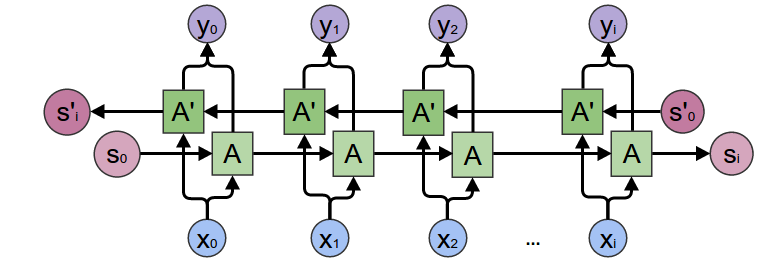

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
n_features = X_train.shape[2]

In [75]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [76]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [77]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=24, 
          validation_split=0.3,
#          shuffle=False,
          callbacks=[early_stop])

Epoch 1/30
465/465 [==============================] - 12s 18ms/step - loss: 0.1262 - val_loss: 0.0543
Epoch 2/30
465/465 [==============================] - 8s 16ms/step - loss: 0.0329 - val_loss: 0.0317
Epoch 3/30
465/465 [==============================] - 8s 17ms/step - loss: 0.0228 - val_loss: 0.0255
Epoch 4/30
465/465 [==============================] - 8s 18ms/step - loss: 0.0195 - val_loss: 0.0401
Epoch 5/30
465/465 [==============================] - 7s 16ms/step - loss: 0.0174 - val_loss: 0.0199
Epoch 6/30
465/465 [==============================] - 7s 16ms/step - loss: 0.0165 - val_loss: 0.0187
Epoch 7/30
465/465 [==============================] - 7s 16ms/step - loss: 0.0160 - val_loss: 0.0282
Epoch 8/30
465/465 [==============================] - 7s 16ms/step - loss: 0.0147 - val_loss: 0.0210
Epoch 9/30
465/465 [==============================] - 8s 17ms/step - loss: 0.0137 - val_loss: 0.0183
Epoch 10/30
465/465 [==============================] - 8s 18ms/step - loss: 0.0136 - val_l

<AxesSubplot:>

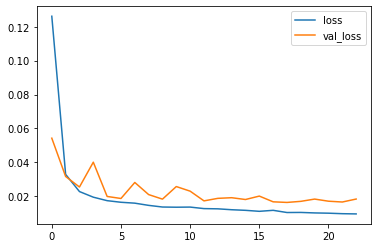

In [78]:
losses = pd.DataFrame(model.history.history)
losses.plot()

---
---

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be use for next prediction¶

In [81]:
y_pred = model.predict(X_test)

In [82]:
eval_metrics(y_test, y_pred)

r2_score: 0.9720114194158214 
mae: 0.06241506986532403 
mse: 0.010184643966301837 
rmse: 0.10091899705358669


### Inverse Transformation and Compare

In [83]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [84]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test

,test,prediction
timestamp,,
2016-11-05 23:00:00,421.0,371.124146
2016-11-06 00:00:00,342.0,341.894592
2016-11-06 01:00:00,282.0,324.480530
2016-11-06 02:00:00,182.0,233.518250
2016-11-06 03:00:00,137.0,161.909241
...,...,...
2017-01-03 19:00:00,1042.0,1167.896606
2017-01-03 20:00:00,541.0,597.393311
2017-01-03 21:00:00,337.0,394.445862


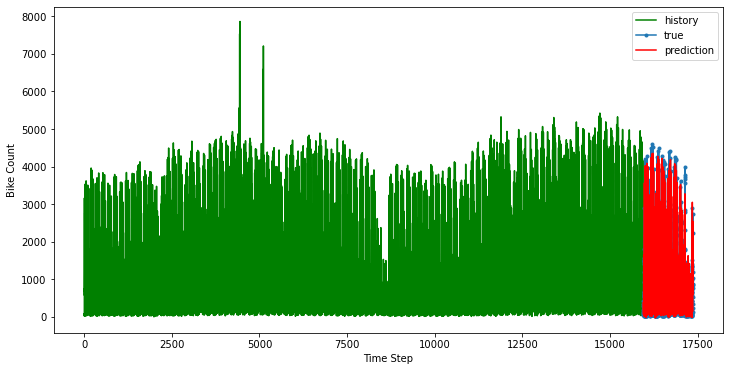

In [85]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

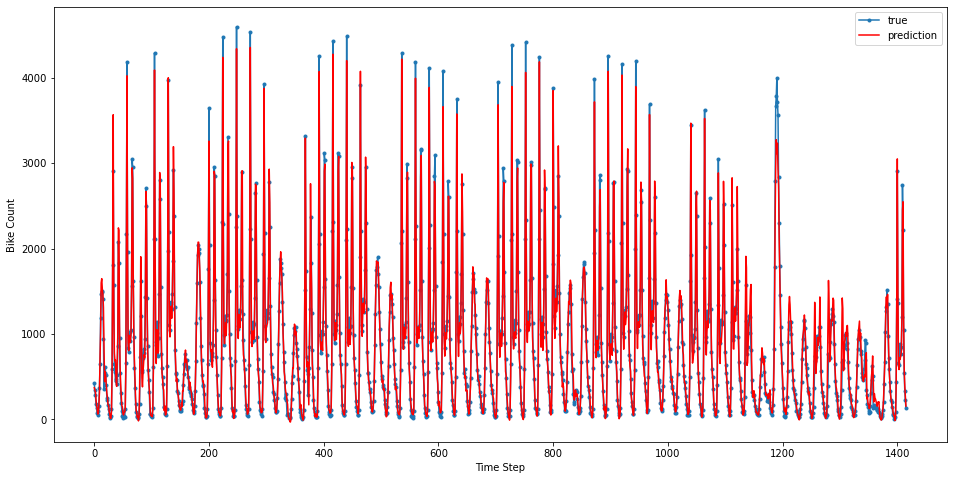

In [86]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### Second way : after each prediction, result will be use for next prediction

In [87]:
test

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_spring,season_summer,season_winter
timestamp,,,,,,,,,,,,,,,,
2016-11-04 23:00:00,-0.271163,-0.7500,0.675,-0.181818,0.0,0.0,23,1,0,0,0,0,0,0,0,0
2016-11-05 00:00:00,-0.380592,-0.8125,0.675,-0.363636,0.0,1.0,0,1,0,0,0,0,0,0,0,0
2016-11-05 01:00:00,-0.384033,-0.8750,0.675,-0.181818,0.0,1.0,1,1,0,0,0,0,0,0,0,0
2016-11-05 02:00:00,-0.461803,-1.0000,0.975,-0.181818,0.0,1.0,2,1,0,0,0,0,0,0,0,0
2016-11-05 03:00:00,-0.490709,-1.0000,0.825,-0.090909,0.0,1.0,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,0.124570,-1.0000,0.375,0.363636,0.0,0.0,19,0,0,0,0,0,0,0,0,1
2017-01-03 20:00:00,-0.220234,-1.0000,0.375,0.545455,0.0,0.0,20,0,1,0,0,0,0,0,0,1
2017-01-03 21:00:00,-0.360633,-0.9375,0.250,0.818182,0.0,0.0,21,0,1,0,0,0,0,0,0,1


In [88]:
df_fake = test.iloc[:time_steps,1:]
df_fake

,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_spring,season_summer,season_winter
timestamp,,,,,,,,,,,,,,,
2016-11-04 23:00:00,-0.7500,0.675,-0.181818,0.0,0.0,23,1,0,0,0,0,0,0,0,0
2016-11-05 00:00:00,-0.8125,0.675,-0.363636,0.0,1.0,0,1,0,0,0,0,0,0,0,0
2016-11-05 01:00:00,-0.8750,0.675,-0.181818,0.0,1.0,1,1,0,0,0,0,0,0,0,0
2016-11-05 02:00:00,-1.0000,0.975,-0.181818,0.0,1.0,2,1,0,0,0,0,0,0,0,0
2016-11-05 03:00:00,-1.0000,0.825,-0.090909,0.0,1.0,3,0,0,0,0,0,0,0,0,0
2016-11-05 04:00:00,-1.0000,0.675,0.000000,0.0,1.0,4,0,1,0,0,0,0,0,0,0
2016-11-05 05:00:00,-0.9375,0.825,-0.181818,0.0,1.0,5,0,0,1,0,0,0,0,0,0
2016-11-05 06:00:00,-0.8750,0.525,-0.272727,0.0,1.0,6,0,0,0,0,0,0,0,0,0
2016-11-05 07:00:00,-0.8125,0.250,0.090909,0.0,1.0,7,0,0,0,0,0,0,0,0,0


In [89]:
reel = np.array(test.iloc[:time_steps,:1])
reel.reshape((1,-1))[0]

array([-0.27116311, -0.38059188, -0.38403304, -0.46180317, -0.49070888,
       -0.52374398, -0.53406745, -0.51204405, -0.40123882, -0.23537509,
        0.08671714,  0.24363386,  0.40467997,  0.5175499 ,  0.61940812,
        0.60839642,  0.49896765,  0.43633861,  0.28079835,  0.08534067,
        0.07639367, -0.06813489, -0.14108741, -0.27873365])

In [90]:
df_fake.shape

(24, 15)

In [91]:
df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1])).shape

(24, 1, 15)

In [92]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

In [93]:
predictions_scaled

[array([-0.32831845], dtype=float32),
 array([-0.40278095], dtype=float32),
 array([-0.4176555], dtype=float32),
 array([-0.46105722], dtype=float32),
 array([-0.49584055], dtype=float32),
 array([-0.52669924], dtype=float32),
 array([-0.51096046], dtype=float32),
 array([-0.4986673], dtype=float32),
 array([-0.4179051], dtype=float32),
 array([-0.34141916], dtype=float32),
 array([-0.20014408], dtype=float32),
 array([-0.02017313], dtype=float32),
 array([0.11684771], dtype=float32),
 array([0.22588748], dtype=float32),
 array([0.29720452], dtype=float32),
 array([0.33764404], dtype=float32),
 array([0.34315836], dtype=float32),
 array([0.27958044], dtype=float32),
 array([0.13060033], dtype=float32),
 array([-0.03315295], dtype=float32),
 array([-0.14868882], dtype=float32),
 array([-0.2290326], dtype=float32),
 array([-0.2815431], dtype=float32),
 array([-0.28226382], dtype=float32)]

In [94]:
reel

array([[-0.27116311],
       [-0.38059188],
       [-0.38403304],
       [-0.46180317],
       [-0.49070888],
       [-0.52374398],
       [-0.53406745],
       [-0.51204405],
       [-0.40123882],
       [-0.23537509],
       [ 0.08671714],
       [ 0.24363386],
       [ 0.40467997],
       [ 0.5175499 ],
       [ 0.61940812],
       [ 0.60839642],
       [ 0.49896765],
       [ 0.43633861],
       [ 0.28079835],
       [ 0.08534067],
       [ 0.07639367],
       [-0.06813489],
       [-0.14108741],
       [-0.27873365]])

### Inverse Transformation and Compare

In [95]:
predictions = cnt_transformer.inverse_transform(predictions_scaled)
reel = cnt_transformer.inverse_transform(reel)

In [96]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])
compare["prediction"] = predictions
compare

,reel,prediction
timestamp,,
2016-11-04 23:00:00,467.0,383.953297
2016-11-05 00:00:00,308.0,275.759280
2016-11-05 01:00:00,303.0,254.146562
2016-11-05 02:00:00,190.0,191.083865
2016-11-05 03:00:00,148.0,140.543682
2016-11-05 04:00:00,100.0,95.705997
2016-11-05 05:00:00,85.0,118.574452
2016-11-05 06:00:00,117.0,136.436413
2016-11-05 07:00:00,278.0,253.783901


<AxesSubplot:xlabel='timestamp'>

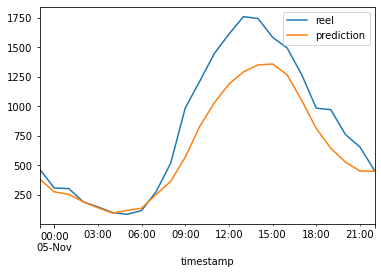

In [97]:
compare.plot()

## 5. Retrain and Forecasting

### Scale full data

In [121]:
df_scaled = df.copy()

In [122]:
f_columns =  ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

df_scaled.loc[:, f_columns] = f_transformer.fit_transform(df_scaled[f_columns])
df_scaled['cnt'] = target_transformer.fit_transform(df_scaled[['cnt']])

In [123]:
df_scaled

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_spring,season_summer,season_winter
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.467762,-1.1875,0.925,-0.857143,0.0,1.0,0,0,0,0,0,0,0,0,0,1
2015-01-04 01:00:00,-0.498852,-1.1875,0.925,-0.952381,0.0,1.0,1,1,0,0,0,0,0,0,0,1
2015-01-04 02:00:00,-0.501678,-1.2500,1.100,-1.428571,0.0,1.0,2,1,0,0,0,0,0,0,0,1
2015-01-04 03:00:00,-0.545487,-1.3125,1.275,-1.428571,0.0,1.0,3,1,0,0,0,0,0,0,0,1
2015-01-04 04:00:00,-0.563151,-1.3125,0.925,-0.809524,0.0,1.0,4,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,0.139905,-0.9375,0.325,0.380952,0.0,0.0,19,0,0,0,0,0,0,0,0,1
2017-01-03 20:00:00,-0.214096,-0.9375,0.325,0.571429,0.0,0.0,20,0,1,0,0,0,0,0,0,1
2017-01-03 21:00:00,-0.358241,-0.8750,0.200,0.857143,0.0,0.0,21,0,1,0,0,0,0,0,0,1


In [124]:
val_size = 24
val = df_scaled.iloc[-val_size:]
full = df_scaled.iloc[:-val_size]
print(len(full), len(val))

17384 24


### reshape to [samples, time_steps, n_features]

In [125]:
X, y = create_dataset(full, full.cnt, time_steps)

print(X.shape, y.shape)

(17360, 24, 16) (17360,)


### Create Final model with full data 

In [126]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [127]:
model.fit(X, y, 
          epochs=15, 
          batch_size=24, 
         # shuffle=False
         )

Epoch 1/15
724/724 [==============================] - 15s 17ms/step - loss: 0.1152
Epoch 2/15
724/724 [==============================] - 13s 17ms/step - loss: 0.0312
Epoch 3/15
724/724 [==============================] - 13s 18ms/step - loss: 0.0220
Epoch 4/15
724/724 [==============================] - 12s 16ms/step - loss: 0.0204
Epoch 5/15
724/724 [==============================] - 12s 17ms/step - loss: 0.0175
Epoch 6/15
724/724 [==============================] - 13s 17ms/step - loss: 0.0165
Epoch 7/15
724/724 [==============================] - 13s 18ms/step - loss: 0.0155
Epoch 8/15
724/724 [==============================] - 11s 16ms/step - loss: 0.0149
Epoch 9/15
724/724 [==============================] - 13s 18ms/step - loss: 0.0146
Epoch 10/15
724/724 [==============================] - 14s 19ms/step - loss: 0.0139
Epoch 11/15
724/724 [==============================] - 13s 18ms/step - loss: 0.0136
Epoch 12/15
724/724 [==============================] - 11s 16ms/step - loss: 0.0130
E

<AxesSubplot:>

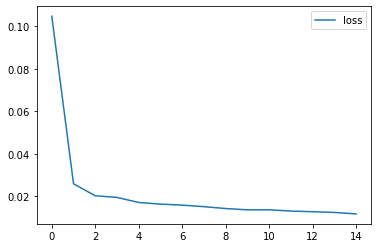

In [105]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### forecasting

In [106]:
df_fake = val.iloc[:,1:]
df_fake

,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_spring,season_summer,season_winter
timestamp,,,,,,,,,,,,,,,
2017-01-03 00:00:00,-1.4375,0.775,-0.380952,0.0,0.0,0,1,0,0,0,0,0,0,0,1
2017-01-03 01:00:00,-1.4375,0.625,-0.476190,0.0,0.0,1,1,0,0,0,0,0,0,0,1
2017-01-03 02:00:00,-1.5000,0.775,-0.380952,0.0,0.0,2,1,0,0,0,0,0,0,0,1
2017-01-03 03:00:00,-1.5625,0.925,-0.190476,0.0,0.0,3,1,0,0,0,0,0,0,0,1
2017-01-03 04:00:00,-1.5625,0.925,-0.095238,0.0,0.0,4,1,0,0,0,0,0,0,0,1
2017-01-03 05:00:00,-1.5000,0.775,-0.095238,0.0,0.0,5,0,0,0,0,0,0,0,0,1
2017-01-03 06:00:00,-1.4375,0.625,0.285714,0.0,0.0,6,1,0,0,0,0,0,0,0,1
2017-01-03 07:00:00,-1.4375,0.625,0.380952,0.0,0.0,7,1,0,0,0,0,0,0,0,1
2017-01-03 08:00:00,-1.4375,0.625,0.333333,0.0,0.0,8,0,0,0,0,0,0,0,0,1


In [107]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([-5.51845964e-01, -5.61738209e-01, -5.65977742e-01, -5.89295178e-01,
       -5.75163399e-01, -5.37714185e-01, -2.89701466e-01,  3.97809574e-01,
        1.45557322e+00,  3.62480127e-01, -1.29305776e-01, -1.46970500e-01,
       -1.34251899e-02,  2.40240240e-02, -5.58205264e-02,  7.06588942e-04,
        2.52252252e-01,  1.34110581e+00,  9.72266384e-01,  1.39904610e-01,
       -2.14096449e-01, -3.58240594e-01, -4.38085144e-01, -4.98145204e-01])

### First way : after each prediction, reel value will be use for next prediction

In [108]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [109]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.9511341551036502 
mae: 0.07460852004120427 
mse: 0.016022735678787873 
rmse: 0.1265809451646964


In [110]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[  73.21619 ,   40.22101 ,   47.22357 ,   41.62024 ,  -17.849243,
          26.333618,  391.98154 , 1235.8193  , 2803.509   , 1480.3291  ,
         695.01056 ,  644.1103  ,  784.9762  ,  793.11017 ,  669.43274 ,
         740.59186 , 1084.7562  , 2377.103   , 2910.7656  , 1221.914   ,
         665.94934 ,  407.72852 ,  236.92548 ,  128.65448 ]],
      dtype=float32)

In [111]:
forecast_index = pd.date_range(start = '2017-01-04 00:00:00', periods = periods, freq = 'H')

In [112]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

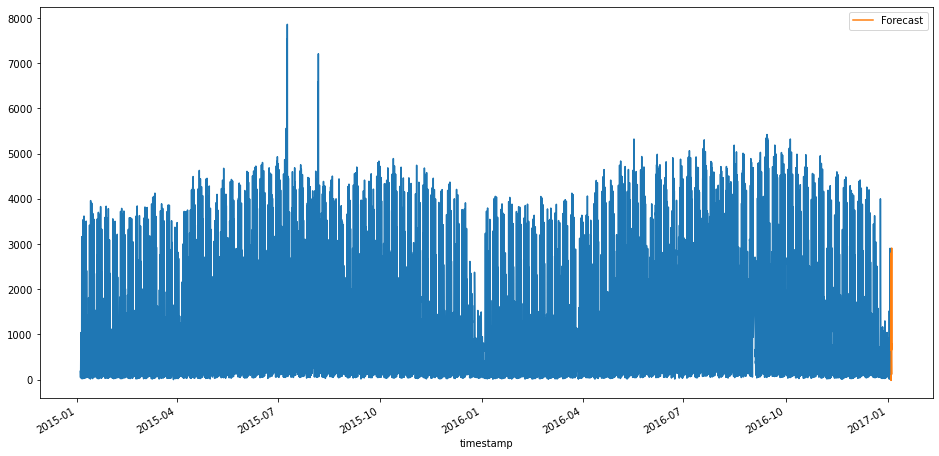

In [113]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(17167.0, 17171.0)

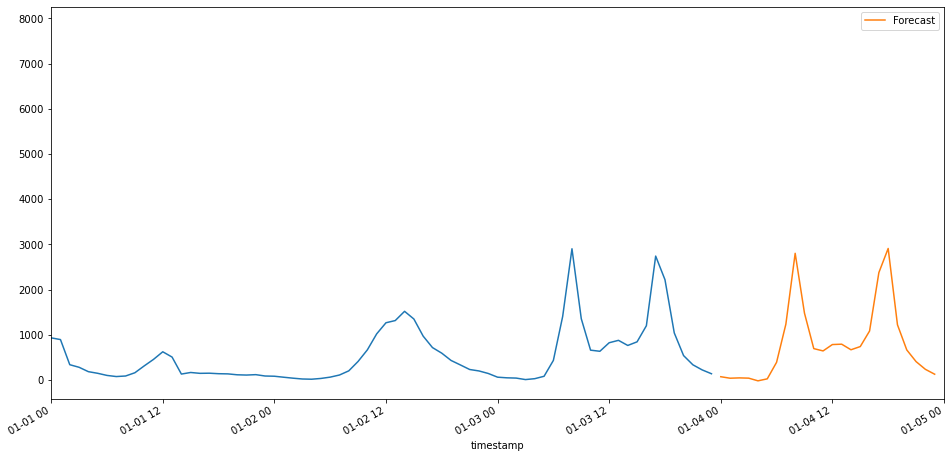

In [114]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01 00:00:00' ,'2017-01-05 00:00:00' )

### Second way : after each prediction, result will be use for next prediction

In [115]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [116]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.8212381001377803 
mae: 0.14543549178225018 
mse: 0.05861465563535665 
rmse: 0.24210463778159363


In [117]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[ 7.3216187e+01,  4.7681152e+01,  4.5338318e+01,  4.4219238e+01,
         1.9354736e+01, -2.1983643e+00,  2.5788000e+02,  9.7698169e+02,
         2.2004121e+03,  1.3437477e+03,  7.8245911e+02,  7.1482556e+02,
         8.2727667e+02,  8.4063879e+02,  6.7936572e+02,  6.3590289e+02,
         7.7468713e+02,  1.5270959e+03,  1.9952671e+03,  1.4546672e+03,
         8.5332892e+02,  5.1832526e+02,  3.3584882e+02,  1.9317291e+02]],
      dtype=float32)

In [118]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

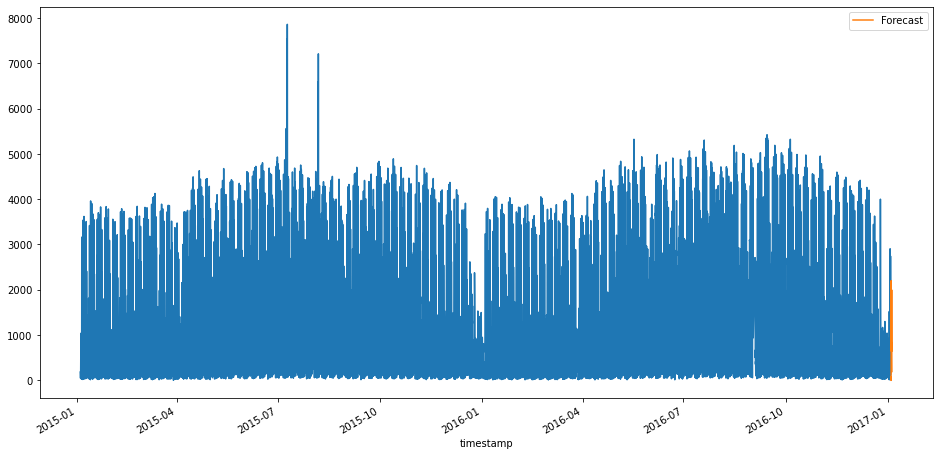

In [119]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(17167.0, 17171.0)

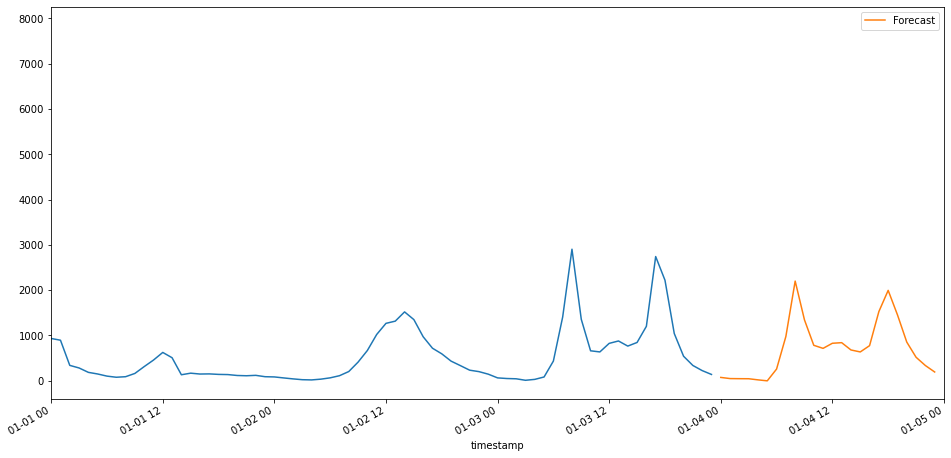

In [120]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01 00:00:00' ,'2017-01-05 00:00:00' )

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___